# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Prepare data

In [20]:
# hyper parameters
bin_size = 50

# load data
all_spike_times = pd.read_pickle("/data/sub-SA_sess-20180802_spike_times.pickle")

units = np.unique(all_spike_times.UnitID.values)
time_stamp_max = int(all_spike_times.SpikeTime.max()) + 1

num_time_bins = int(time_stamp_max/bin_size) + 1
bins = np.arange(num_time_bins) * bin_size

df = pd.DataFrame(data={'bin_idx': np.arange(num_time_bins)[:-1]})
for unit in units:
    unit_spike_times = all_spike_times[all_spike_times.UnitID==unit].SpikeTime.values
    unit_spike_counts, bin_edges = np.histogram(unit_spike_times, bins=bins)
    df[f'unit_{unit}'] = unit_spike_counts

df

,bin_idx,unit_0,unit_1,unit_2,unit_3,unit_4,unit_5,unit_6,unit_7,unit_8,...,unit_49,unit_50,unit_51,unit_52,unit_53,unit_54,unit_55,unit_56,unit_57,unit_58
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283532,283532,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
283533,283533,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
283534,283534,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
283535,283535,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


<StemContainer object of 3 artists>

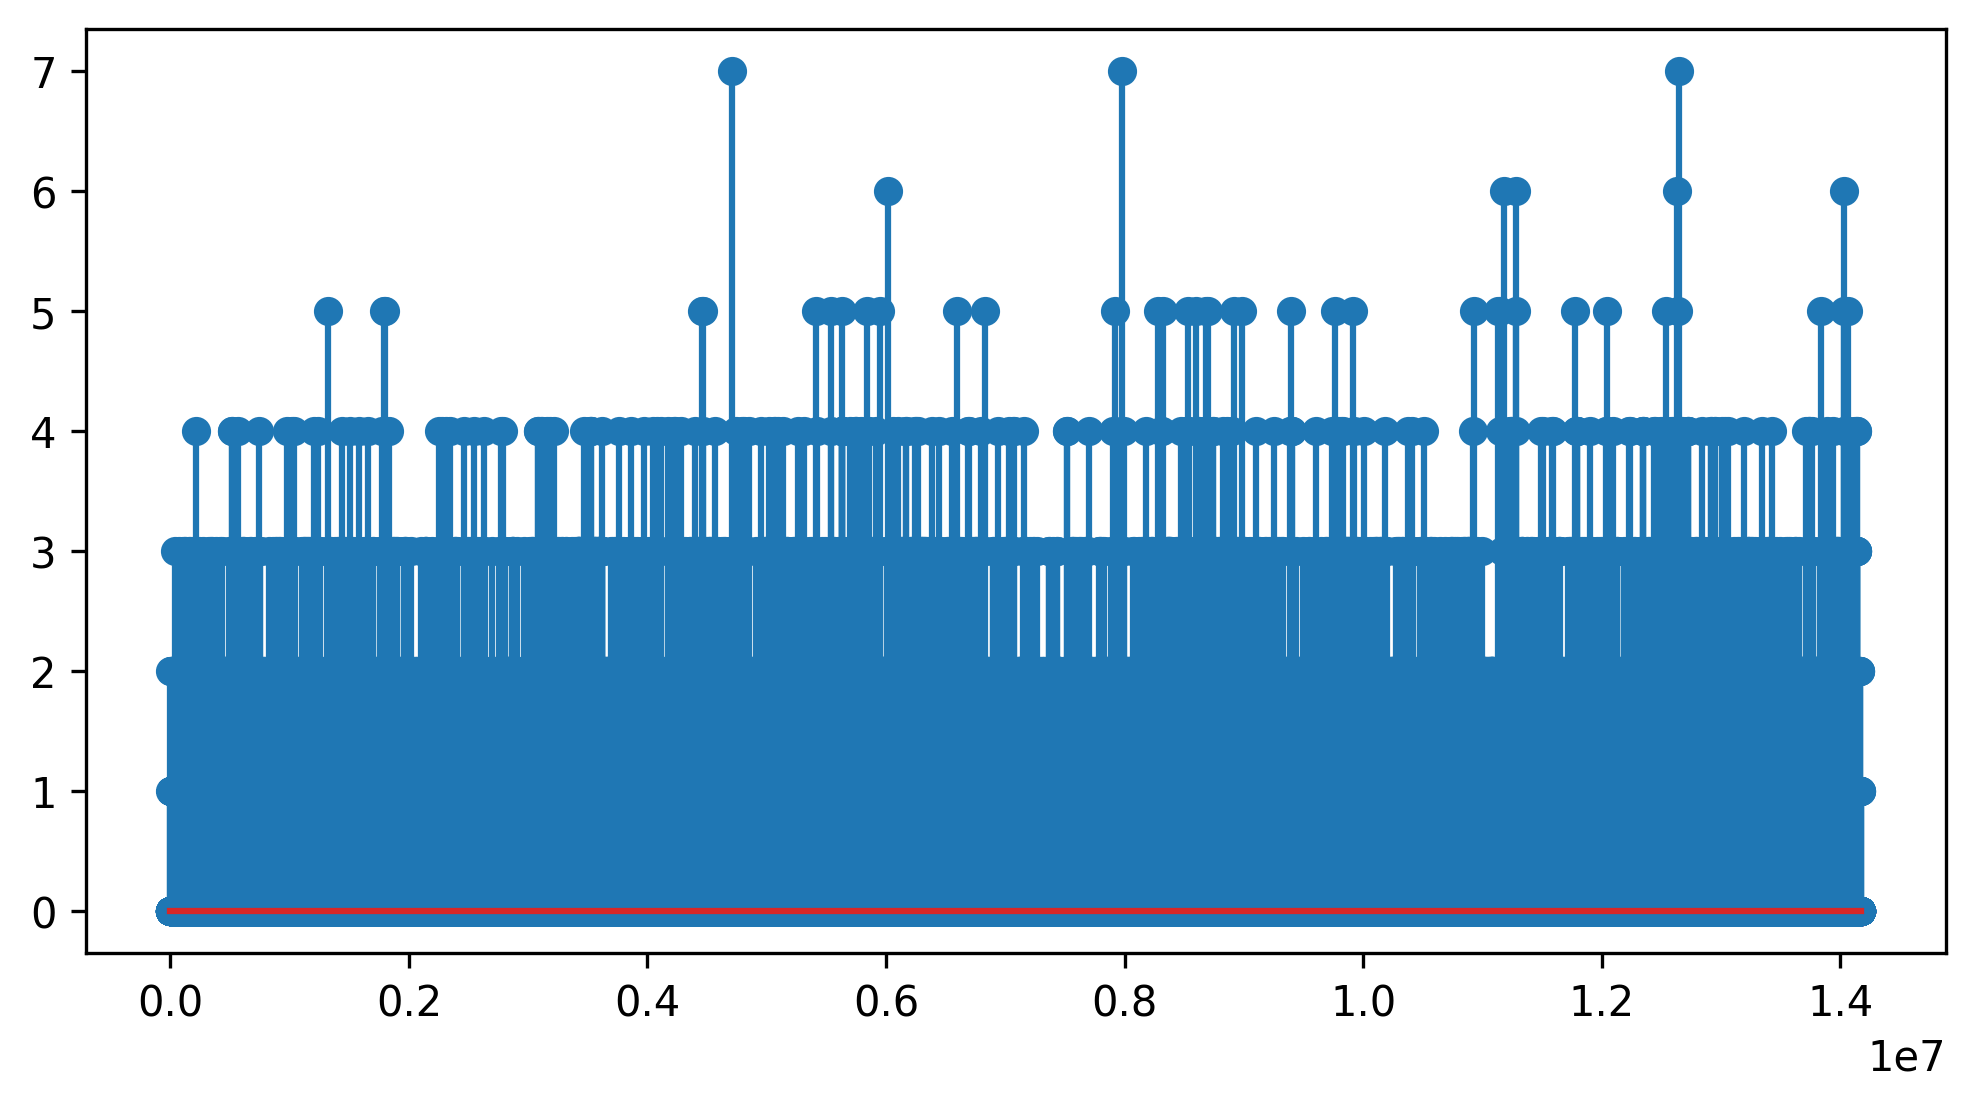

In [22]:
# plot spike counts
unit = 33
plt.figure(figsize=(8,4), dpi=300)
plt.stem(bins[:-1], df[f'unit_{unit}'].values)

In [23]:
# save as pickle
df.to_pickle('/data/processed/sub-SA_sess-20180802_spike_counts_binsize_50.pickle')

# generate design matrix

In [24]:
# read data
df_spk_cts = pd.read_pickle('/data/processed/sub-SA_sess-20180802_spike_counts_binsize_50.pickle')
df_behav = pd.read_pickle('/data/processed/sub-SA_sess-20180802_behavior_binsize_50.pickle')

In [25]:
df_behav.columns

Index(['CIRCLE', 'SQUARE', 'STAR', 'TRIANGLE', 'CYAN', 'GREEN', 'MAGENTA',
       'YELLOW', 'ESCHER', 'POLKADOT', 'RIPPLE', 'SWIRL', 'CORRECT',
       'INCORRECT', 'bin_idx'],
      dtype='object')

In [26]:
df_spk_cts

,bin_idx,unit_0,unit_1,unit_2,unit_3,unit_4,unit_5,unit_6,unit_7,unit_8,...,unit_49,unit_50,unit_51,unit_52,unit_53,unit_54,unit_55,unit_56,unit_57,unit_58
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283532,283532,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
283533,283533,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
283534,283534,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
283535,283535,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [27]:
df_temp = df_spk_cts.shift(periods=1)

In [28]:
df_temp

,bin_idx,unit_0,unit_1,unit_2,unit_3,unit_4,unit_5,unit_6,unit_7,unit_8,...,unit_49,unit_50,unit_51,unit_52,unit_53,unit_54,unit_55,unit_56,unit_57,unit_58
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283532,283531.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
283533,283532.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283534,283533.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
283535,283534.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# hyperparameter
tau_pre = 20
tau_post = 0

unit_id = 0
df_design_matrix = pd.DataFrame()
for bin_idx in [500, 502]:
    r_t = df_spk_cts[df_spk_cts['bin_idx's]=bin_idx][f'unit_{unit}']
    for tau in range(tau_pre):
        bin_idx_tau = bin_idx - tau
        for var in [var in df_behav.columns if var != 'bin_idx']:
            df_behav_tau = df_behav[df_behav['bin_idx']=bin_idx_tau]
            
        if tau > 0:
            r_tau = df_spk_cts[df_spk_cts['bin_idx']=bin_idx][f'unit_{unit}']